# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# autoload self-written modules
%load_ext autoreload
%autoreload 2
import utils as ut

In [7]:
train = pd.read_csv('data/dataset.csv')
train.rename(columns = {'Unnamed: 0': 'index', "undesirable": 'y'}, inplace=True)
train.set_index('index', inplace=True)

In [8]:
train

,id,Gender,bmi,chol_level,age_group,y
index,,,,,,
1,A0057,F,19.197902,1,2,0
2,A0090,F,35.256996,2,2,1
3,A0103,F,27.654057,2,1,1
4,A0120,F,31.155840,3,3,1
5,A0148,F,31.778012,2,1,1
...,...,...,...,...,...,...
167,F0211,M,35.724386,1,2,0
168,F0227,F,31.685858,2,2,1
169,F0248,F,27.826692,3,2,1


## Imbalanced label

In [9]:
np.mean(train['y'])

0.6666666666666666

## Distribution of numeric features

Numeric summary.

In [10]:
train.describe()

,bmi,chol_level,age_group,y
count,171.000000,171.000000,171.000000,171.000000
mean,27.721071,2.000000,1.953216,0.666667
std,4.528939,0.818895,0.734149,0.472789
min,18.459523,1.000000,1.000000,0.000000
25%,24.648846,1.000000,1.000000,0.000000
50%,26.943762,2.000000,2.000000,1.000000
75%,30.551033,3.000000,2.000000,1.000000
max,40.303820,3.000000,3.000000,1.000000


Conduct Shapiro-Wilk test to test normality.

Actually, it doesn't matter much even if the covariates are not normally distributed.

In [17]:
# Shapiro-Wilk test
pvalues = []
for i in range(1, 11):
    pvalues.append(stats.shapiro(train.iloc[:,i])[1])
print(pvalues)
print("\nThe smallest p-value:")
print(min(pvalues)) # smallest pvalue
print("\nThe index of the smallest p-value:")
print(pvalues.index(min(pvalues)))

pvalues = np.array(pvalues)
k = 4
result = np.argpartition(pvalues, k)
print(f"\n{k} smallest p-values:")
print(pvalues[result[:k]])

[1.270684391041499e-10, 0.008311355486512184, 3.627542016770846e-11, 1.4990902920558895e-16, 0.002965618623420596, 1.6431514135439862e-11, 1.1341824103294285e-15, 2.5119344809493988e-14, 3.182653927069623e-07, 7.114887151660199e-11]

The smallest p-value:
1.4990902920558895e-16

The index of the smallest p-value:
3

4 smallest p-values:
[1.49909029e-16 1.13418241e-15 2.51193448e-14 1.64315141e-11]


Density plot of V25 which is the feature with the smallest pvalue of Shapiro-Wilk test.

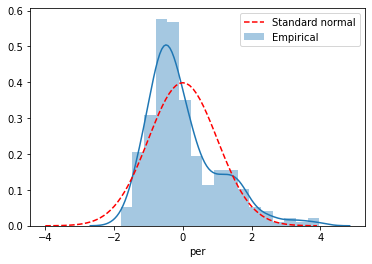

In [20]:
# density plot of V25 which is the feature with the smallest pvalue of Shapiro-Wilk test
sns.distplot(train.iloc[:, 3], label = "Empirical")
h = np.arange(-4, 4, 0.1)
fit = stats.norm.pdf(h, 0, 1) 
plt.plot(h, fit, 'r--', label = "Standard normal")
plt.legend()
plt.show()

## Correlation of numeric features

The image has been saved to 'images/heatmap.pdf'.


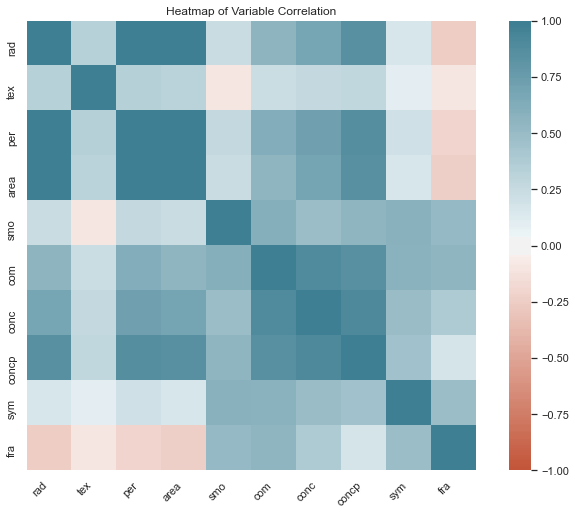

Grouping:
1: ['rad', 'per', 'area', 'concp']
2: ['com', 'conc']
Others: ['tex', 'smo', 'sym', 'fra']


In [21]:
# correlation heatmap
X = train.drop(columns = ['y'])
ut.show_corr(X, cutoff=0.7)

## Preliminary variable selection

Investigate the relationship between numeric features and response by boxplot. 

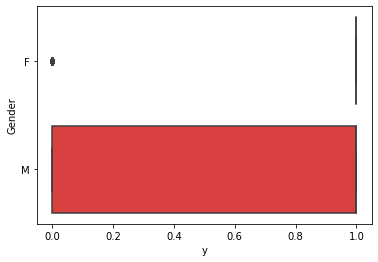

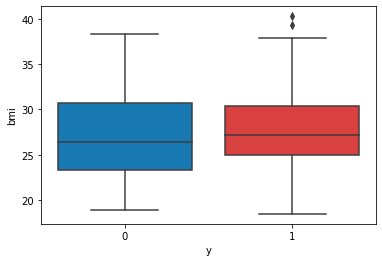

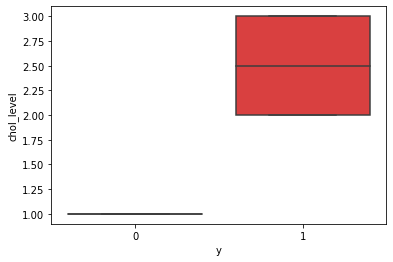

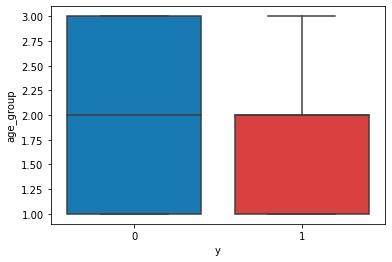

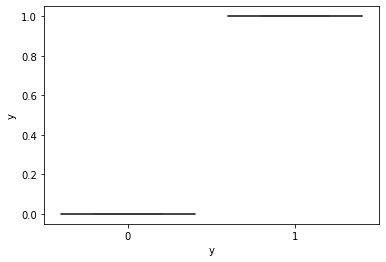

IndexError: single positional indexer is out-of-bounds

In [11]:
# boxplot: covariate vs response
for i in range(1, 11):
    sns.boxplot(x = train["y"], y = train.iloc[:, i], palette=[(0, 0.50, 0.80),(0.95, 0.15, 0.15)])
    plt.show()

By examine the boxplots, we found except for `fra`, all other variables are significant.

##  Identical distribution of the training and testing data

Conduct Kolmogorov-Smirnov test between training and test set to test they have identical distribution.

In [23]:
##  Kolmogorov-Smirnov test between train and test
pvalues_KS = []
for i in range(1, 11):
    pvalues_KS.append(stats.ks_2samp(train.iloc[:,i], test.iloc[:,i])[1])
print(pvalues_KS)

print("\nThe smallest p-value:")
print(min(pvalues_KS))

pvalues_KS = np.array(pvalues_KS)
k = 4
result = np.argpartition(pvalues_KS, k)
print(f"\n{k} smallest p-values:")
print(pvalues_KS[result[:k]])

[0.8134455833714642, 0.9798641973996761, 0.8258251079754675, 0.8725247886672455, 0.2709911017279074, 0.5030802897398907, 0.2877122106624025, 0.5989701154772322, 0.9087172219124175, 0.059598676311822696]

The smallest p-value:
0.059598676311822696

4 smallest p-values:
[0.05959868 0.2709911  0.28771221 0.50308029]


All numeric features have identical distribution in training and test set.